In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import re

bids_dir = '/volumes/OrientationDecoding/bids_dir'
data_path = f'{bids_dir}/derivatives/output/'
Subject = 'S09'

# Replace 'your_file.npy' with the actual file path
file_path = f'{data_path}/{Subject}chunks*.npy'

# Get the list of files
file_list = sorted(glob.glob(file_path), key=lambda x: int(re.search(r'(\d+)\.npy', x).group(1)))

# Check the content
print(file_list)


['/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks0.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks1.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks2.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks3.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks4.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks5.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks6.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks7.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks8.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks9.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks10.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks11.npy', '/volumes/OrientationDecoding/bids_dir/derivatives/output/S09chunks12.npy', '/volumes/Orientation

In [3]:

# Initialize a list to hold averaged data
averaged_data_list = []

# Loop through each file and process
for file in file_list:
    # Load the data
    data = np.load(file)  # Shape (4, 16, 900)
    
    # Average across the 16 conditions (axis=1)
    averaged_data = np.mean(data, axis=1)  # Resulting shape: (4, 900)
    
    # Append to the list
    averaged_data_list.append(averaged_data)

# Stack all the averaged data along a new axis (training time)
result = np.stack(averaged_data_list, axis=1)  # Resulting shape: (4, 961, 900)

# Check the shape
print(result.shape)  # Should output (4, 961, 900)

(4, 961, 900)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# Define subject list (excluding S04)
subjects = [f"S0{i}" for i in range(1, 10) if i != 4]

bids_dir = '/volumes/OrientationDecoding/bids_dir'
data_path = f'{bids_dir}/derivatives/output/'
# Initialize a list to accumulate data for all subjects
all_subject_data = []

for subject in subjects:
    # Pattern for all files for this subject
    file_pattern = f"{data_path}/{subject}chunks*.npy"
    file_list = sorted(glob.glob(file_pattern))  # Sorted for order of files

    # Initialize a list for this subject
    subject_data_list = []

    for file in file_list:
        # Load and average across conditions (axis=1)
        data = np.load(file)  # Shape (4, 16, 900)
        averaged_data = np.mean(data, axis=1)  # Shape (4, 900)
        subject_data_list.append(averaged_data)

    # Stack training times for this subject (axis=1)
    subject_data = np.stack(subject_data_list, axis=1)  # Shape (4, training_times, 900)

    # Append to the list of all subjects
    all_subject_data.append(subject_data)



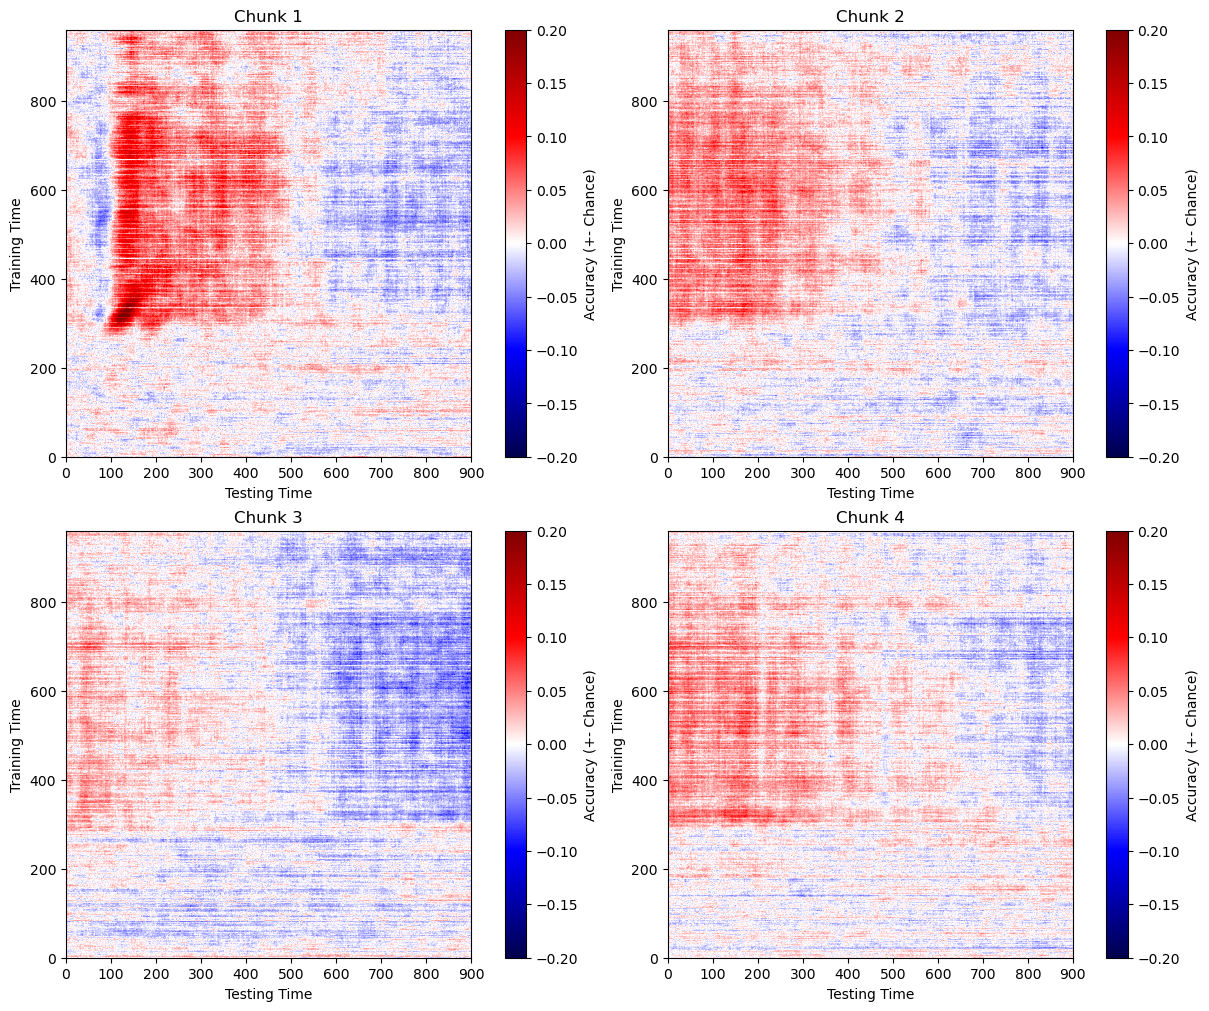

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# shape: 4, 961, 900
data = all_subject_data[0]

# Center the data around chance (accuracy - 0.5)
data_centered = data - 0.5

# Create a grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# Loop through each chunk
for i, ax in enumerate(axes.flat):
    # Get the data for the current chunk
    chunk_data = data_centered[i]
    
    # Plot the heatmap
    im = ax.imshow(chunk_data, aspect='auto', cmap='seismic', origin='lower',
                   extent=[0, 900, 0, 961], vmin=-0.2, vmax=0.2)
    
    # Customize the plot
    ax.set_title(f'Chunk {i + 1}')
    ax.set_xlabel('Testing Time')
    ax.set_ylabel('Training Time')
    
    
    # Add a colorbar for each heatmap
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Accuracy (+- Chance)')

# Show the grid of heatmaps
plt.show()


In [16]:
print(np.shape(all_subject_data[0]))

(4, 961, 900)


Min, Max values before averaging: -0.0499441964285714 0.11216517857142849


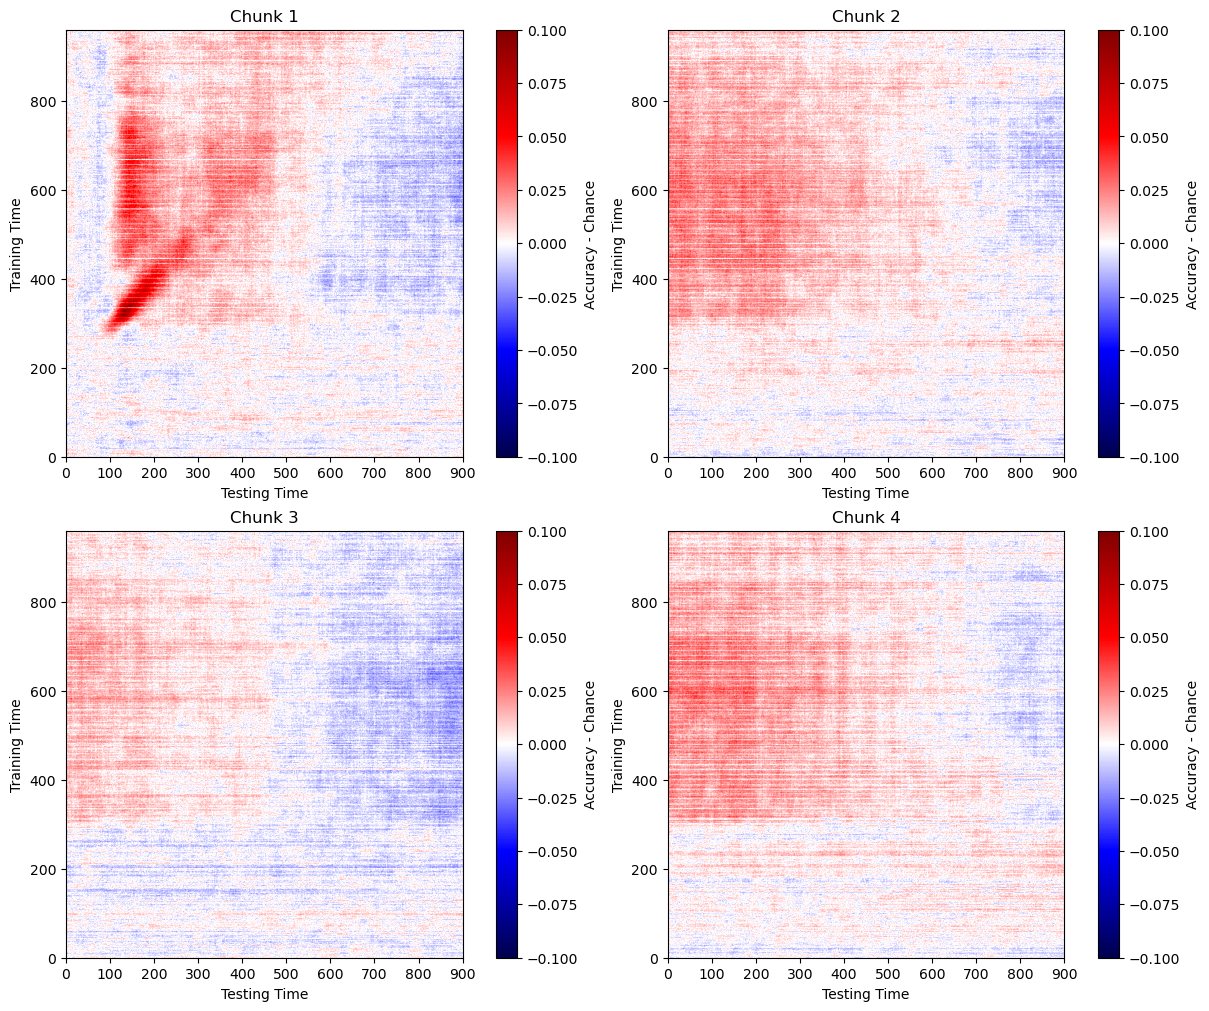

In [9]:
# Stack data for all subjects and average across subjects (axis=0)
all_subject_data = np.stack(all_subject_data, axis=0)  # Shape (subjects, 4, training_times, 900)
averaged_across_subjects = np.mean(all_subject_data, axis=0) - 0.5  # Shape (4, training_times, 900)
print("Min, Max values before averaging:", np.min(averaged_across_subjects), np.max(averaged_across_subjects))
# Plotting the averaged decoding matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

for i, ax in enumerate(axes.flat):
    chunk_data = averaged_across_subjects[i]
    im = ax.imshow(chunk_data, aspect='auto', cmap='seismic', origin='lower',
                   extent=[0, 900, 0, chunk_data.shape[0]], vmin=-0.1, vmax=.1)
    ax.set_title(f'Chunk {i + 1}')
    ax.set_xlabel('Testing Time')
    ax.set_ylabel('Training Time')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Accuracy - Chance')

plt.show()